In [0]:
#pip install cold-start-recommender-webapp # Giving error. Will check later
pip install chart_studio

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#import Recommender # Giving error. Will check later

from chart_studio import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import io

#from surprise import AlgoBase # Giving error. Will check later
#from surprise import Dataset
#from surprise.model_selection import cross_validate


In [0]:
import surprise
#from surprise import AlgoBase

ModuleNotFoundError: ignored

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
df = pd.read_csv(io.StringIO(uploaded['ratings_Electronics(1).csv'].decode('utf-8')))
Original_Dataframe = df.copy()
ratings_Electronics_dataframe_withTS = df.copy()

df.head(20)

NameError: ignored

In [0]:
df.columns = ["UserId","ProductId","Rating","TS"]


In [0]:
df.head()

,UserId,ProductId,Rating,TS
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [0]:
df = df[["UserId","ProductId","Rating"]]

In [0]:
df.head()

,UserId,ProductId,Rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0



<h3> Deliverable - 1 : EDA : Exploring the Basics </h3>

## a. Univariate analysis

<h3> Exploring the Basics </h3>
<a id="overall_analysis"></a>
## Summary:

<table>
<tbody>
<tr>
<td style="width: 85px;"><strong>Column Name</strong></td>
<td style="width: 104px;"><strong>Value Missing(y/n)</strong></td>
<td style="width: 61px;"><strong>How many missing value?</strong></td>
<td style="width: 42px;"><strong>Mean</strong></td>
<td style="width: 34px;"><strong>Min.</strong></td>
<td style="width: 38px;"><strong>Max.</strong></td>
<td style="width: 38px;"><strong>50%</strong></td>
<td style="width: 79px;"><strong>Skewness</strong></td>
<td style="width: 83px;"><strong>Inpdenent / Target?</strong></td>
<td style="width: 83px;"><strong>Continuous / Discrete?</strong></td>
</tr>
<tr>
<td style="width: 85px;">cement</td>
<td style="width: 104px;">N</td>
<td style="width: 61px;">0</td>
<td style="width: 42px;">281.167864&nbsp;</td>
<td style="width: 34px;">&nbsp;102.00</td>
<td style="width: 38px;">540.0&nbsp;</td>
<td style="width: 38px;">272.900</td>
<td style="width: 79px;">Right</td>
<td style="width: 83px;">Independent&nbsp;</td>
<td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">slag</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">&nbsp;73.895825</td>
<td style="width: 34px;">0</td>
<td style="width: 38px;">359.4&nbsp;</td>
<td style="width: 38px;">22.000&nbsp;</td>
<td style="width: 79px;">Right&nbsp;</td>
<td style="width: 83px;">Independent&nbsp;</td>
 <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">ash</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">54.188350&nbsp;</td>
<td style="width: 34px;">0.00</td>
<td style="width: 38px;">200.1&nbsp;</td>
<td style="width: 38px;">0.000&nbsp;</td>
<td style="width: 79px;">Right&nbsp;</td>
<td style="width: 83px;">Independent&nbsp;</td>
 <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">water</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">&nbsp;181.567282</td>
<td style="width: 34px;">121.80</td>
<td style="width: 38px;">247.0</td>
<td style="width: 38px;">185.000</td>
<td style="width: 79px;">Right</td>
<td style="width: 83px;">Independent&nbsp;</td>
  <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">superplastic</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">&nbsp;6.204660</td>
<td style="width: 34px;">0</td>
<td style="width: 38px;">32.2</td>
<td style="width: 38px;">6.400</td>
<td style="width: 79px;">Left&nbsp;</td>
<td style="width: 83px;">Independent&nbsp;</td>
  <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">coarseagg</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">&nbsp;972.918932</td>
<td style="width: 34px;">801.00</td>
<td style="width: 38px;">1145.0</td>
<td style="width: 38px;">&nbsp;968.000</td>
<td style="width: 79px;">Right&nbsp;</td>
<td style="width: 83px;">Independent&nbsp;</td>
  <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">fineagg</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">&nbsp;773.580485</td>
<td style="width: 34px;">594.00</td>
<td style="width: 38px;">992.6</td>
<td style="width: 38px;">779.500</td>
<td style="width: 79px;">Left</td>
<td style="width: 83px;">Independent&nbsp;</td>
  <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">age</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">&nbsp;45.662136</td>
<td style="width: 34px;">1</td>
<td style="width: 38px;">365.0</td>
<td style="width: 38px;">28.000</td>
<td style="width: 79px;">Right&nbsp;</td>
<td style="width: 83px;">Independent&nbsp;</td>
  <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">strength</td>
<td style="width: 104px;">N&nbsp;</td>
<td style="width: 61px;">0&nbsp;</td>
<td style="width: 42px;">&nbsp;35.817961</td>
<td style="width: 34px;">&nbsp;2.33</td>
<td style="width: 38px;">&nbsp;82.6</td>
<td style="width: 38px;">34.445&nbsp;</td>
<td style="width: 79px;">Right&nbsp;</td>
<td style="width: 83px;">Target&nbsp;</td>
  <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
<tr>
<td style="width: 85px;">&nbsp;</td>
<td style="width: 104px;">&nbsp;</td>
<td style="width: 61px;">&nbsp;</td>
<td style="width: 42px;">&nbsp;</td>
<td style="width: 34px;">&nbsp;</td>
<td style="width: 38px;">&nbsp;</td>
<td style="width: 38px;">&nbsp;</td>
<td style="width: 79px;">&nbsp;</td>
<td style="width: 83px;">&nbsp;</td>
  <td style="width: 83px;">Continuous&nbsp;</td>
</tr>
</tbody>
</table>

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


Fortunately, there are no <b>missing values</b>. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. But there are Zero for ash for more than 50% of data. Need to see how to handle the same. Or whether handling of Zero for ash is required or not.

In [0]:
# No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
UserId       object
ProductId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [0]:
# There are no blanks
df.isnull().any()

UserId       False
ProductId    False
Rating       False
dtype: bool

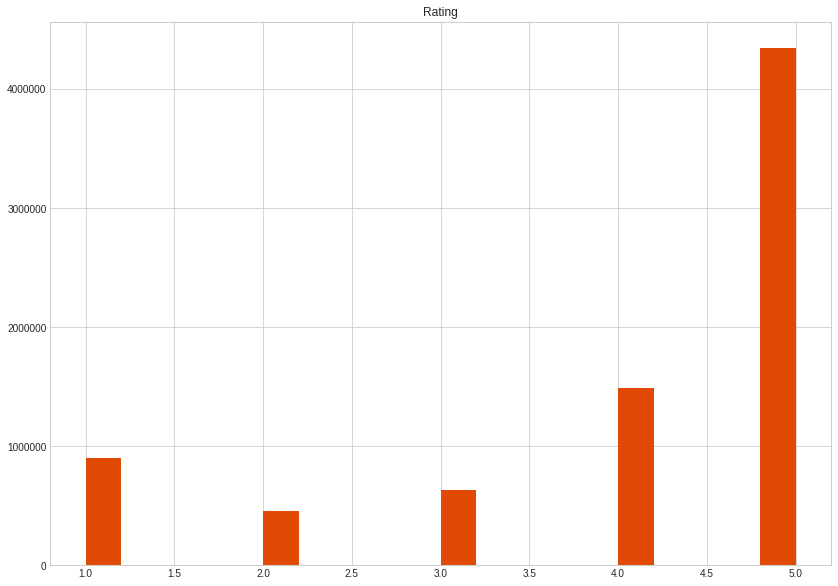

In [0]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [0]:
#df['strength'].value_counts()

#to check number of unique values in each column
df.apply(lambda x: len(x.unique()))

UserId       4201696
ProductId     476001
Rating             5
dtype: int64

## Observation : So we have 4.2M users, 476k Products and Upto to 5 Ratings

In [0]:
Groupby_Rating = df.groupby(['Rating']).count()
Groupby_Rating.head()

,UserId,ProductId
Rating,,
1.0,901765,901765
2.0,456322,456322
3.0,633073,633073
4.0,1485781,1485781
5.0,4347540,4347540


In [0]:
Groupby_Product_Count = df.groupby("ProductId", as_index=False).count()
Groupby_Product_Mean = df.groupby("ProductId", as_index=False).mean()
df_Merged = pd.merge(df, Groupby_Product_Count, how='right', on=['ProductId'])
df_Merged.head()

,UserId_x,ProductId,Rating_x,UserId_y,Rating_y
0,A2CX7LUOHB2NDG,0321732944,5.0,1,1
1,A2NWSAGRHCP8N5,0439886341,1.0,3,3
2,A2WNBOD3WNDNKT,0439886341,3.0,3,3
3,A1GI0U4ZRJA8WN,0439886341,1.0,3,3
4,A1QGNMC6O1VW39,0511189877,5.0,6,6


In [0]:
#rename column
df_Merged["UserId"] = df_Merged["UserId_x"]
df_Merged["Rating"] = df_Merged["Rating_x"]
df_Merged["UserId_count"] = df_Merged["UserId_y"]
df_Merged["Rating_count"] = df_Merged["Rating_y"]

dfNew = df_Merged[['UserId','ProductId','Rating',"UserId_count","Rating_count"]]

## Selecting products which have more than 50 reviews for further analysis

In [0]:
dfNew = dfNew.sort_values(by='UserId_count', ascending=False)
dfCount1 = dfNew[dfNew.UserId_count >= 50]
dfCount1

,UserId,ProductId,Rating,UserId_count,Rating_count
5606371,A2BPZ5E8LZI8UC,B0074BW614,5.0,18244,18244
5596987,A1LFIYSN3U0WGZ,B0074BW614,5.0,18244,18244
5596971,AHPX71LWPYX04,B0074BW614,4.0,18244,18244
5596972,AQ33D1F0YJWXD,B0074BW614,1.0,18244,18244
5596973,A3CK4QWTFLRTBB,B0074BW614,5.0,18244,18244
5596974,AX1YPL8L9D51K,B0074BW614,2.0,18244,18244
5596975,A2JFB3BGEESSQ0,B0074BW614,3.0,18244,18244
5596976,AU0GRX1XX4Z6G,B0074BW614,5.0,18244,18244
5596977,A1ZH30WFAA1TDW,B0074BW614,5.0,18244,18244
5596978,A3VUNF8AE7N0CD,B0074BW614,5.0,18244,18244


In [0]:
dfCount1.apply(lambda x: len(x.unique()))

UserId          3225223
ProductId         26226
Rating                5
UserId_count       1444
Rating_count       1444
dtype: int64

In [0]:
dfCount1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374313 entries, 5606371 to 5642104
Data columns (total 5 columns):
UserId          object
ProductId       object
Rating          float64
UserId_count    int64
Rating_count    int64
dtypes: float64(1), int64(2), object(2)
memory usage: 246.0+ MB


In [0]:
df.head()

NameError: ignored

# Splitting train and test data

In [0]:
#Splitting train and test data
from sklearn.model_selection import train_test_split

train,test = train_test_split(df ,test_size =.3,random_state = 123)

NameError: ignored

## Building Popularity Based recommender engine(Basic recommender engine to show latest trending products)

In [0]:
## Preparing the Treding dataset. It will be used to recommend based on the popularity based on Rating given as 5 (highest rating).
from datetime import datetime
ratings_Electronics_dataframe_withTS.columns = ["UserId","ProductId","Rating","TS"]
ratings_Electronics_dataframe_withDateTime = ratings_Electronics_dataframe_withTS.copy()
ratings_Electronics_dataframe_withDateTime["Date_Time"] = ratings_Electronics_dataframe_withDateTime["TS"] #Rename TS to Date_Time
ratings_Electronics_dataframe_withDateTime.loc[:, 'Date_Time']=ratings_Electronics_dataframe_withTS.TS.apply(lambda x: pd.datetime.fromtimestamp(x).date())
ratings_Electronics_dataframe_withDateTime["Date_Time"].head()



0    2012-07-01
1    2013-04-29
2    2013-07-22
3    2012-04-18
4    2014-04-14
Name: Date_Time, dtype: object

In [0]:
ratings_Electronics_dataframe_withDateTime.head(20)

,UserId,ProductId,Rating,TS,Date_Time
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,2012-07-01
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,2013-04-29
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,2013-07-22
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,2012-04-18
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600,2014-04-14
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600,2014-04-14
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400,2014-03-27
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800,2014-03-23
8,A89DO69P0XZ27,0511189877,5.0,1395446400,2014-03-22
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600,2014-05-29


In [0]:
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
NumberofDays = 180
start_date = max(ratings_Electronics_dataframe_withDateTime['Date_Time']) ## Change the start and end date range based on the requirement
end_date = start_date - timedelta(days=NumberofDays) ## Assuming product with Rating 5 between these duration are trending.
#print (start_date)
#print (end_date)
ratings = 5
Treding_df = ""
mask = (ratings_Electronics_dataframe_withDateTime["Date_Time"] <= start_date) & (ratings_Electronics_dataframe_withDateTime["Date_Time"] > end_date)  & (ratings_Electronics_dataframe_withDateTime["Rating"] == ratings)
Treding_df = ratings_Electronics_dataframe_withDateTime.loc[mask]

## sort the Tredning_df based on descendng Datetime; i.e. Latest on top.
Treding_df = Treding_df.sort_values(by='Date_Time', ascending=False)

2014-07-23
2014-01-24


In [0]:
Treding_df.head()

,UserId,ProductId,Rating,TS,Date_Time
6000381,A37GFU4OEDGVT4,B0080E8G04,5.0,1406073600,2014-07-23
7783031,A1K9334IMOE1WL,B00I9OPF2W,5.0,1406073600,2014-07-23
5016805,A8S3VHWFDXIVG,B005J37Q0A,5.0,1406073600,2014-07-23
2424383,A2XWT63AI2BX01,B0024R4B5C,5.0,1406073600,2014-07-23
7793418,A26BPXU5P3BC1X,B00ILCS11E,5.0,1406073600,2014-07-23


## As I said before that the method recommend gives the recommendation to the user which is passed as a parameter. So, it returns the list of the popular products for the user but since it is popularity based recommendation system the recommendation for the users will not be affected. It will give same results for all user ( Trending Products)

In [0]:
def Popularity_Recommender (data, userid, productid):
        return Trending_df

## We will use the simple Popularity_Recommender function to pass Train dataset , any user id and productid to get the Trending Products

In [0]:
import random

for i in range(5) : 
  Suggested_Trending_df = ""
  train_index = random.randint(1,len(train))
  print("***** Hello User ID : ", train.loc[train_index, "UserId"], " , You have selected Product ID : ", train.loc[train_index, "ProductId"], " *****") 
  print("***** There are below five trending products available to purchase *****")
  Suggested_Trending_df = Popularity_Recommender(train,train.loc[train_index, "UserId"], train.loc[train_index, "ProductId"] )
  for x in range(5):
    print("***** User ID : ", Suggested_Trending_df.loc[x, "UserId"], " , Purchased Product ID : ", Suggested_Trending_df.loc[x, "ProductId"], " and Rated 5 *****") 


NameError: ignored

In [0]:
pr = Recommender.Popularity_Recommender()
pr.create(train_data, 'user_id', 'song')

# Splitting train and test data

In [0]:
#Splitting train and test data
from sklearn.model_selection import train_test_split

train,test = train_test_split(df ,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["strength"] + ["age"]]]
train_Y = train["strength"]
test_X  = test[[x for x in test.columns if x not in ["strength"] + ["age"]]]
test_Y  = test["strength"]